# Projet 6 : Classifiez automatiquement des biens de consommation

Vous êtes Data Scientist au sein de l’entreprise "Place de marché”, qui souhaite lancer une marketplace e-commerce.

logo entreprise place de marché
Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.

Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs, et est donc peu fiable. De plus, le volume des articles est pour l’instant très petit.

Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle, il devient nécessaire d'automatiser cette tâche.

Linda, Lead Data Scientist, vous demande donc d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories, avec un niveau de précision suffisant.

Voici le mail qu’elle vous a envoyé.

 

Bonjour, 

Merci pour ton aide sur ce projet !

Ta mission est de réaliser, dans une première itération, une étude de faisabilité d'un moteur de classification d'articles, basé sur une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article.

Tu dois analyser les descriptions textuelles et les images des produits, au travers des étapes suivantes : 

Un prétraitement des données texte ou image suivant le cas ;
Une extraction de features ;
Une réduction en 2 dimensions, afin de projeter les produits sur un graphique 2D, sous la forme de points dont la couleur correspondra à la catégorie réelle ;
Analyse du graphique afin d’en déduire ou pas, à l’aide des descriptions ou des images, la faisabilité de regrouper automatiquement des produits de même catégorie ;
Réalisation d’une mesure pour confirmer ton analyse visuelle, en calculant la similarité entre les catégories réelles et les catégories issues d’une segmentation en clusters.
Pourrais-tu nous démontrer, par cette approche, la faisabilité de regrouper automatiquement des produits de même catégorie ?

Voici les contraintes : 

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf ;
une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
une approche de type word/sentence embedding avec BERT ;
une approche de type word/sentence embedding avec USE (Universal Sentence Encoder). 
En pièce jointe, tu trouveras un exemple de mise en œuvre de ces approches d’extraction de features texte sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :
un algorithme de type SIFT / ORB / SURF ;
un algorithme de type CNN Transfer Learning.
Concernant l’approche de type SIFT, je t’invite à regarder le webinaire que nous avons réalisé, disponible dans les ressources.

En pièces jointes, tu trouveras un exemple de mise en œuvre de l’approche de type CNN Transfer Learning d’extraction de features images sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Merci encore, 

Linda

PS : J’ai bien vérifié qu’il n’y avait aucune contrainte de propriété intellectuelle sur les données et les images.

Pièces jointes : 

premier jeu de données d’articles avec le lien pour télécharger la photo et une description associée
un notebook d’exemple d’étude de faisabilité


Une semaine plus tard, vous partagez votre travail avec Linda, et elle vous répond avec enthousiasme avec une autre demande.

Bonjour,

Merci beaucoup pour ton travail !

Bravo d’avoir démontré la faisabilité de regrouper automatiquement des produits de même catégorie ! 

Maintenant, je te propose de passer à la deuxième itération. Pourrais-tu réaliser une classification supervisée à partir des images ? Je souhaiterais que tu mettes en place une data augmentation afin d’optimiser le modèle.

En pièce jointe, tu trouveras un exemple de mise en œuvre de classification supervisée sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Nous souhaitons élargir notre gamme de produits, en particulier dans l’épicerie fine. Pourrais-tu tester la collecte de produits à base de “champagne” via l’API disponible ici ? Je souhaiterais que tu puisses nous fournir une extraction des 10 premiers produits dans un fichier “.csv”, contenant pour chaque produit les données suivantes : foodId, label, category, foodContentsLabel, image.

Merci encore, 

Linda

Pièces jointes : 

un notebook d’exemple de classification supervisée d’images
Bon courage !

# 

# Sommaire

## I. Importation des données
### 1. Importation des bibliothèques
### 2. Importation du fichier


## II. Préparation des données
### 1. Création du Data Generator
### 2. Séparation du jeu de données
### 3. Finalisation de la préparation


## III. Modélisation
### 1. CNN 
### 2. VGG19
### 3. RESNET 50
### 4. Analyse des résultats
### 5. Test du meilleur modèle

# 

## I. Importation des données

### 1. Importation des bibliothèques

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread
import time
import seaborn as sns


from sklearn.model_selection import train_test_split

import os
from os import listdir


import cv2
from keras.models import Model
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50

# Analyse des résultats
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


start_time = time.time()

### 2. Importation du fichier

In [2]:
# Importation du jeu de données

data = pd.read_csv('data_image.csv')

# Recupération d'un datset avec image et leur label 

data_image = data[["image", "cat_label"]]

path = "C:/Users/gregm/OneDrive/Bureau/Formation OCR/Projet 6/Images/"

list_photos = [file for file in listdir(path)]
print(len(list_photos))

data_image.image = data_image.image.apply(lambda x: path+str(x) )

1050


C:\Users\gregm\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
label = ['0', '1', '2', '3', '4', '5', '6']
for i in range(len(label)):
    data_verif = data.loc[data['cat_label'] == i]
    cat = data_verif['cat_lvl_1'].iloc[0]
    print('Le label {} correspond à la catégorie suivante :  {}' .format(i, cat))

Le label 0 correspond à la catégorie suivante :  Baby Care
Le label 1 correspond à la catégorie suivante :  Beauty and Personal Care
Le label 2 correspond à la catégorie suivante :  Computers
Le label 3 correspond à la catégorie suivante :  Home Decor & Festive Needs
Le label 4 correspond à la catégorie suivante :  Home Furnishing
Le label 5 correspond à la catégorie suivante :  Kitchen & Dining
Le label 6 correspond à la catégorie suivante :  Watches


# 

## II. Préparation des données

### 1. Création du Data Generator

In [4]:
# Créer un générateur d'images
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True)

### 2. Séparation du jeu de données

Nous allons procéder à la séparation de notre jeu de données à travers la méthode du train_test_split.

Toutefois, nous allons séparer notre jeu de données en 3 parties :
- jeu d'entrainement : 80% de notre base de données,
- jeu de test : 20% de notre base de données
- jeu de validation : 25% du jeu de test.

In [5]:
# Sélectionner les caractéristiques et les étiquettes
X = data_image["image"]
y = data_image["cat_label"].astype(str)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser l'ensemble de test en ensembles de test et de validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

### 3. Finalisation de la préparation

Nous allons finaliser notre jeu de données à travers la génération de nouvelles images pour nos différentes séparations du jeu de données.

Pour cela, l'utilisation du Data Generator créé en amont sera nécessaire à cette finalisation

In [6]:
# Générer de nouvelles images pour les ensembles d'entraînement
df_train=pd.DataFrame({"image": X_train, "cat_label": y_train})
train_generator = datagen.flow_from_dataframe(dataframe = df_train,
                                              x_col="image", 
                                              y_col="cat_label", 
                                              target_size=(224,224), 
                                              batch_size=32, 
                                              class_mode="categorical")

# Générer de nouvelles images pour l'ensemble de test
df_test = pd.DataFrame({"image": X_test, "cat_label": y_test})
test_generator = datagen.flow_from_dataframe(dataframe= df_test, 
                                             x_col="image", 
                                             y_col="cat_label", 
                                             target_size=(224,224), 
                                             batch_size=32, 
                                             class_mode="categorical")

# Générer de nouvelles images pour l'ensemble de validation
df_val = pd.DataFrame({"image": X_val, "cat_label": y_val})
val_generator = datagen.flow_from_dataframe(dataframe= df_val, 
                                             x_col="image", 
                                             y_col="cat_label", 
                                             target_size=(224,224), 
                                             batch_size=32, 
                                             class_mode="categorical")

Found 840 validated image filenames belonging to 7 classes.
Found 157 validated image filenames belonging to 7 classes.
Found 53 validated image filenames belonging to 7 classes.


## III. Modélisation

Afin de procéder à notre modélisation, nous allons prendre la décision de modéliser 3 modèles :
- un réseau CNN créé à notre niveau avec les différentes couches,
- le modèle de Transfer Learning VGG19 que nous avons testé lors de l'étude de faisabilité,
- le modèle de Transfer Learning RESNET50.

Afin d'effectuer une étude identique pour ces derniers, nous allons entraîner ces modèles sur un nombre d'epochs similaires, à savoir 12 epochs.
Nous allons également mettre en place un EarlyStop avec une patience de 3 epochs sur le val_loss uniquement sur les modèles de Transfer Learning, cela nous permettra d'analyser l'impact du Early Stop sur un entrainement.

Pour nos modèles de Transfer Learning, nous allons prendre l'initiative d'ajouter quelques couches supplémentaires.
Ces deux modèles auront des modifications identiques afin d'obtenir le meilleur modèle.



In [7]:
# Création du Early Stop
early_stop = EarlyStopping(monitor='val_loss',patience=3)

# Définir le nombre d'itérations d'entraînement
epochs = 12

### 1. CNN

In [8]:
# Créer le modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()


# Entraîner le modèle sur les données d'entraînement
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_batch_size=32)

end_time = time.time()
execution_time = end_time - start_time
print("Temps d'exécution de la cellule : ", execution_time, " secondes")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

Notre premier modèle indique un score de 0.36. Nous constatons une certaine dégradation de notre modèle avec un score assez faible. Ce dernier ne sera pas conservé.

A présent, nous allons procédr à l'utilisation des modèles de Transfer Learning tout y intégrant un EarlyStop.

### 2. VGG 19

In [9]:
from tensorflow.keras.layers import Input

# Charger le modèle pré-entrainé VGG19
inputs = Input(shape=(224, 224, 3))
vgg_model = VGG19(include_top=False, weights=None, input_tensor=inputs, classes = 7)
outputs = vgg_model.output

# Ajouter des couches supplémentaires
x = MaxPooling2D(pool_size=(2, 2))(outputs) # couche de pooling
x = Flatten()(x) # couche de flattening
x = Dense(128, activation='relu')(x) # couche dense avec 128 neurones et une fonction d'activation relu
predictions = Dense(7, activation='softmax')(x) # couche dense de sortie avec 7 neurones et une fonction d'activation softmax

# Construire le modèle complet
model = Model(inputs=inputs, outputs=predictions)

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Entraîner le modèle sur les données d'entraînement
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_batch_size=32,
                    callbacks=[early_stop])

end_time = time.time()
execution_time = end_time - start_time
print("Temps d'exécution de la cellule : ", execution_time, " secondes")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Ce modèle présente un score très faible avec environ 0.15. Nous n'allons pas conserver ce modèle.

De plus, ce modèle présente un délai  très long à la différence du précédent modèle.
L'utilisation du Early Stop a permis de stopper l'entrainement au moment le plus opportun.

Nous allons finaliser notre classification à travers le modèle du RESNET50


### 3. RESNET 50

In [10]:
# Charger le modèle pré-entrainé RESNET50
inputs = Input(shape=(224, 224, 3))
resnet_model = ResNet50(include_top=False, weights='imagenet', input_tensor=inputs, classes=7)
outputs = resnet_model.output

# Ajouter des couches supplémentaires
x = MaxPooling2D(pool_size=(2, 2))(outputs) # couche de pooling
x = Flatten()(x) # couche de flattening
x = Dense(128, activation='relu')(x) # couche dense avec 128 neurones et une fonction d'activation relu
predictions = Dense(7, activation='softmax')(x) # couche dense de sortie avec 7 neurones et une fonction d'activation softmax

# Construire le modèle complet
model = Model(inputs=inputs, outputs=predictions)

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

# Entraîner le modèle sur les données d'entraînement
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_batch_size=32,
                    callbacks=[early_stop])

end_time = time.time()
execution_time = end_time - start_time
print("Temps d'exécution de la cellule : ", execution_time, " secondes")

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Ce modèle présente les meilleurs résultats avec un accuracy de 0.66 ce qui représente un très bon score. Ce modèle sera conservé pour notre phase d'analyse et de test.

A présent, nous allons procéder à l'analyse de notre meilleur modèle, à savoir le RESNET50.

Pour cela, le jeu de validation (val_generator) sera utilisé pour l'évaluation.

Enfin, nous pourrons procéder à la phase de test de notre modèle grâce à notre jeu de test. 

### 4. Analyse des résultats

###### Définition 

loss (ou perte en français) : il s'agit d'une mesure d'erreur qui permet d'évaluer la différence entre les prédictions du modèle et les vraies étiquettes (ou labels). Plus la valeur de cette mesure est faible, meilleure est la performance du modèle.

val_loss (ou perte de validation en français) : il s'agit de la perte évaluée sur les données de validation, qui sont des données distinctes des données d'entraînement et sur lesquelles le modèle n'a pas été entraîné. La perte de validation permet d'évaluer la performance du modèle sur des données qu'il n'a jamais vues auparavant.

accuracy (ou précision en français) : il s'agit d'une mesure de performance qui permet de mesurer la proportion d'observations correctement classées par le modèle. Elle est calculée comme le nombre d'observations correctement classées divisé par le nombre total d'observations.

val_accuracy (ou précision de validation en français) : il s'agit de la précision évaluée sur les données de validation. Comme la perte de validation, la précision de validation permet d'évaluer la performance du modèle sur des données qu'il n'a jamais vues auparavant.

<AxesSubplot:>

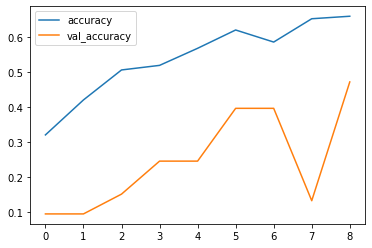

In [11]:
losses = pd.DataFrame(model.history.history)

losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

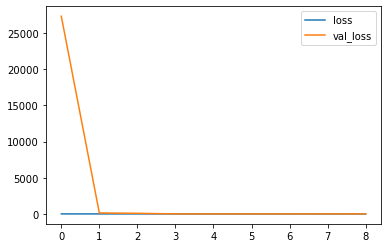

In [12]:
losses[['loss','val_loss']].plot()

In [13]:
# Calculer la perte et l'exactitude sur l'ensemble de validation
eval_results = model.evaluate(val_generator)

# Afficher les résultats
print('Perte de validation:', eval_results[0])
print('Exactitude de validation:', eval_results[1])


2/2 [==============================] - 9s 3s/step - loss: 2.1854 - accuracy: 0.4906
Perte de validation: 2.1854326725006104
Exactitude de validation: 0.49056604504585266


La perte de validation est la valeur de la fonction de perte calculée sur l'ensemble de validation. La perte mesure l'écart entre les prédictions du modèle et les vraies étiquettes (ou cibles) associées à l'ensemble de validation. L'objectif de l'entraînement est de minimiser la perte, c'est-à-dire de rendre les prédictions du modèle aussi proches que possible des vraies étiquettes.

L'exactitude de validation est le taux de classification correct sur l'ensemble de validation, c'est-à-dire le pourcentage d'images dans l'ensemble de validation qui ont été correctement classées par le modèle. L'exactitude est une métrique importante pour mesurer les performances d'un modèle de classification car elle donne une indication du pourcentage de prédictions correctes que le modèle peut effectuer. Cependant, il est important de noter que l'exactitude ne fournit pas toujours une image complète des performances du modèle, car il peut y avoir des déséquilibres de classe dans l'ensemble de données qui peuvent fausser l'exactitude. C'est pourquoi il est également important de consulter des mesures de performance telles que la matrice de confusion et le rapport de classification.

Nous pouvons constater une amélioration de notre modèle avec un passage de 0.13(VGG19) à 0.66 (RESNET50).

Notre courbe peut nous permettre d'émettre l'hypothèse qu'une augmentation du nombre d'epochs pourrait permettre une amélioration de notre modèle avec un score qui peut dépasser 0.7.

Toutefois, le résultat obtenu est très satisfaisant et demontre un excellent apprentissage de ce modèle.

### 5. Test

Le jeu de test sera utilisé pour cette dernière phase.

Afin d'analyser les résultats obtenus, nous allons utiliser une matrice de confusion et un rapport de classification.

C:\Users\gregm\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


5/5 [==============================] - 31s 5s/step


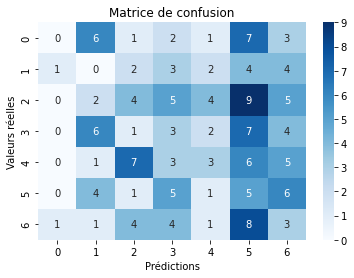

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        16
           2       0.20      0.14      0.16        29
           3       0.12      0.13      0.12        23
           4       0.21      0.12      0.15        25
           5       0.11      0.23      0.15        22
           6       0.10      0.14      0.12        22

    accuracy                           0.11       157
   macro avg       0.11      0.11      0.10       157
weighted avg       0.12      0.11      0.11       157



In [14]:
def evaluate_model(model, test_generator):
    # Obtenir les prédictions pour l'ensemble de test
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Convertir les étiquettes en vecteurs de classe
    y_true = test_generator.classes

    # Obtenir les noms de classe pour les étiquettes réelles
    class_names = list(test_generator.class_indices.keys())

    # Calculer la matrice de confusion
    confusion_mtx = confusion_matrix(y_true, y_pred_classes)

    # Afficher la matrice de confusion sous forme graphique
    sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, cmap='Blues', annot=True, fmt='d')
    plt.title('Matrice de confusion')
    plt.xlabel('Prédictions')
    plt.ylabel('Valeurs réelles')
    plt.show()

    # Afficher le rapport de classification
    print(classification_report(y_true, y_pred_classes, target_names=class_names))


# Appel de notre fonction    
evaluate_model(model, test_generator)

Ce rapport de classification montre les performances du modèle pour chaque classe et pour l'ensemble des classes. Il montre également l'accuracy globale (précision globale) du modèle pour toutes les classes combinées.

Pour chaque classe, le rapport de classification affiche les mesures de précision, de rappel et de f1-score. La précision mesure la proportion d'images correctement classées dans cette classe parmi toutes les images classées dans cette classe. Le rappel mesure la proportion d'images correctement classées dans cette classe parmi toutes les images réelles de cette classe. Le f1-score est une moyenne harmonique de précision et de rappel.

Le rapport de classification montre que le modèle a des performances très faibles pour toutes les classes, avec des précisions allant de 0 à 0,20, des rappels allant de 0 à 0,23 et des f1-scores allant de 0 à 0,21. Cela suggère que le modèle ne fonctionne pas bien pour la tâche de classification des données de test.

L'accuracy globale est de 0,11, ce qui signifie que le modèle n'est correct que dans 11% des cas. En conclusion, ce modèle nécessite une amélioration significative pour être utilisé avec succès dans la classification de données.



Voici quelques pistes de réflexion nous permettant d'améliorer notre modèle et par conséquent le test de ce dernier :

- Augmenter la quantité de données. Nous avons travaillé avec un jeu de données initial de 1050. Les modèles de Deep Learning sont très attractifs avec plusieurs dizaines voir centaines de milliers de données,

- Améliorer la catégorisation des produits. En effet, certains produits ont une catégorie assez similaire et un travail en amont pourrait permettre une meilleure classification,

- Utiliser d'autres réseaux de neurones tels que le modèle 'InceptionV3' pour obtenir des résultats plus attractifs.